In [1]:
cd


/home/rupam


In [2]:
cd Desktop

/home/rupam/Desktop


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('salaries.csv')

In [5]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
df.shape

(16, 4)

In [7]:
inputs=df.drop('salary_more_then_100k',axis='columns')

In [8]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [9]:
target=df['salary_more_then_100k']

In [10]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [26]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])

In [31]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [33]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [35]:
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.2)

In [41]:
len(x_train)

12

In [36]:
from sklearn import tree

In [37]:
model=tree.DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred=model.predict(x_test)

In [44]:
y_pred

array([0, 0, 1, 0])

In [45]:
y_test

9     1
7     0
11    1
2     1
Name: salary_more_then_100k, dtype: int64

In [46]:
model.score(x_test,y_test)

0.5

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm=confusion_matrix(y_pred,y_test)

In [51]:
cm

array([[1, 2],
       [0, 1]])

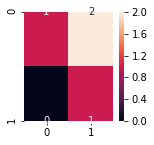

In [52]:
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True)


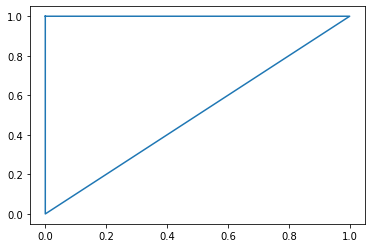

In [54]:
plt.plot(y_pred,y_test)